In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Reading the data
# train_path = r'C:\dev\env\movie-genres-classification-train.csv'
# df = pd.read_csv(train_path)
path = r'C:\dev\env\movie_genre_by_subtitle_df.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
# other data exploration
df.info() 
df.isnull().sum()
# There is no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


id       0
text     0
genre    0
dtype: int64

In [5]:
classes_num = len(df['genre'].unique())
classes_num

9

In [6]:
df['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [7]:
le=LabelEncoder()
cat=le.fit_transform(df['genre'])
le.classes_
le.inverse_transform([0,1,2,3,4,5,6,7,8])

array(['action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller'], dtype=object)

In [8]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6,7,8]),[0,1,2,3,4,5,6,7,8]))
df['enc_genre'] = cat

In [9]:
df['genre'].value_counts()
df['enc_genre'].value_counts()

3    8873
8    6824
2    2941
0    2392
7     613
4     456
5     270
1     147
6      63
Name: enc_genre, dtype: int64

In [10]:
all_genres = nltk.FreqDist(df['genre']) 
all_genres

FreqDist({'drama': 8873, 'thriller': 6824, 'comedy': 2941, 'action': 2392, 'sci-fi': 613, 'horror': 456, 'other': 270, 'adventure': 147, 'romance': 63})

In [11]:
# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list(all_genres.values())})

In [12]:
all_genres_df

,Genre,Count
0,thriller,6824
1,comedy,2941
2,drama,8873
3,action,2392
4,sci-fi,613
5,other,270
6,romance,63
7,horror,456
8,adventure,147


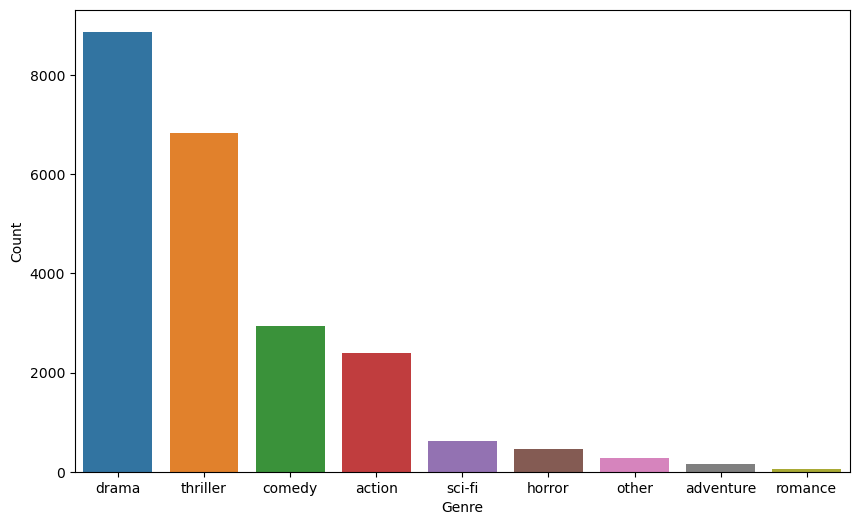

In [13]:
g = all_genres_df.nlargest(columns="Count", n = all_genres_df.shape[0]) 
plt.figure(figsize=(10,6)) 
ax = sns.barplot(data=g, x= "Genre", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [14]:
# Imbalanced Data
# I should deal with this imbalanced data!!!

In [15]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [16]:
df['clean_text'] = df['text'].apply(lambda x: clean_text(x))

In [17]:
df.head()

,id,text,genre,enc_genre,clean_text
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8,eady dead maybe even wishing he was int nd flo...
1,2,"t, summa cum laude and all. And I'm about to l...",comedy,2,t summa cum laude and all and im about to laun...
2,3,"up Come, I have a surprise.... She takes him ...",drama,3,up come i have a surprise she takes him by the...
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8,ded by the two detectives int jeffs apartment ...
4,5,"nd dismounts, just as the other children reach...",drama,3,nd dismounts just as the other children reach ...


In [18]:
def freq_words(x, terms = 10): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(8,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.bar_label(ax.containers[0], fmt='%d')
  ax.set(ylabel = 'Word') 
  plt.show()

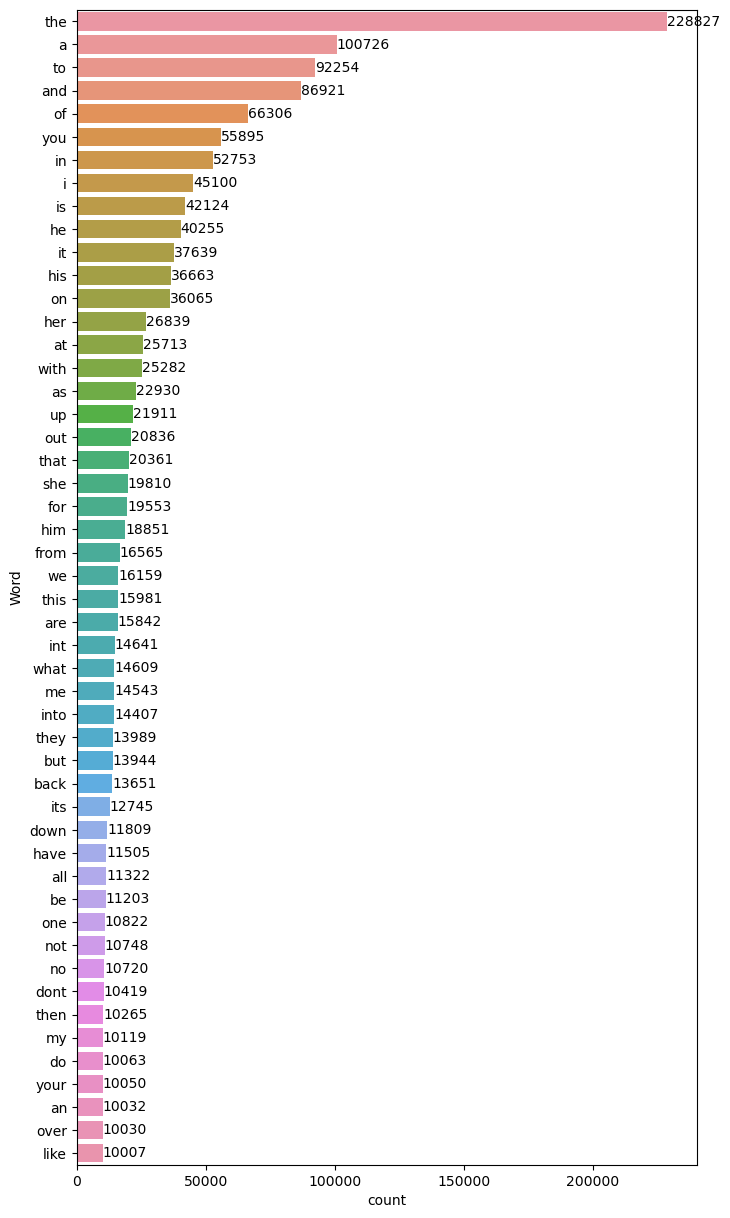

In [19]:
# print 100 most frequent words 
freq_words(df['clean_text'], 50)

In [20]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [21]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [22]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))

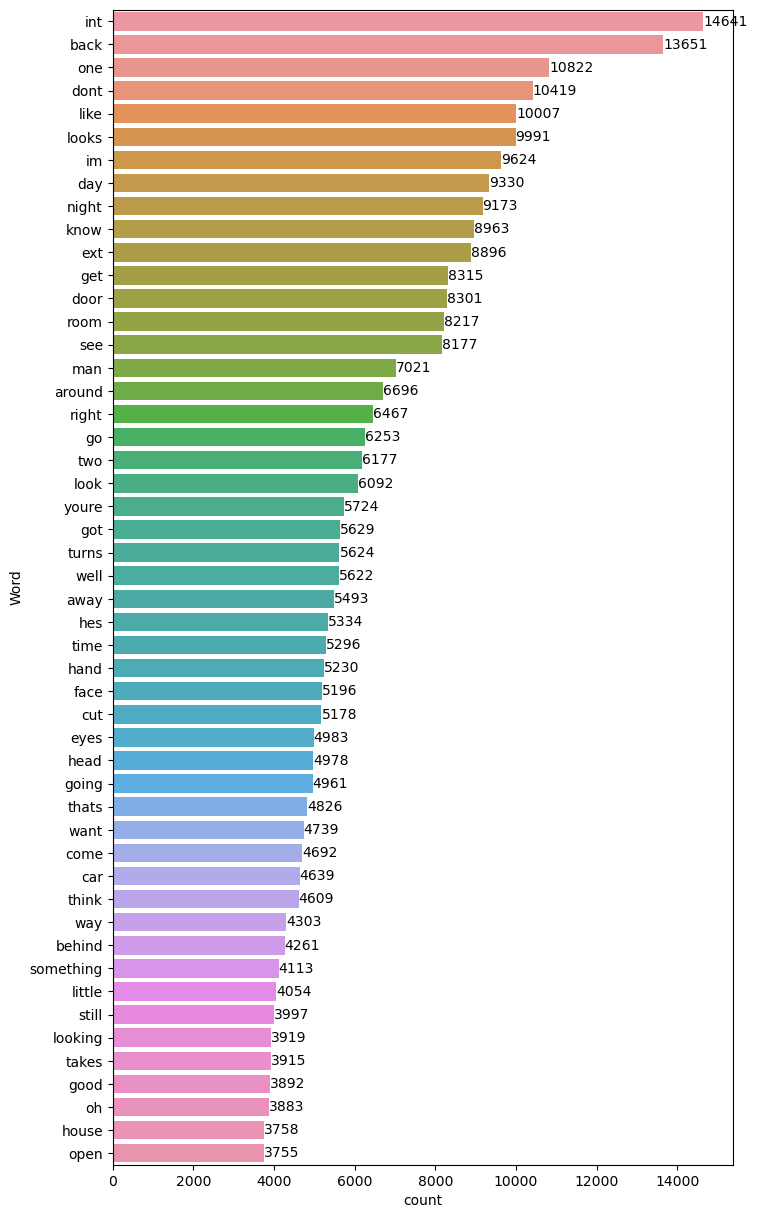

In [23]:
freq_words(df['clean_text'], 50)

In [24]:
# Methods: TF-IDF, Bag-of-Words, word2vec, GloVe, ELMo

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [25]:
# split dataset into training and validation set
# xtrain, xval, ytrain, yval = train_test_split(df['clean_text'], y, test_size=0.2, random_state=9)
xtrain, xval, ytrain, yval = train_test_split(df[['id','clean_text']], df['genre'], test_size=0.2, random_state=9)

In [26]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain['clean_text'])
xval_tfidf = tfidf_vectorizer.transform(xval['clean_text'])

In [27]:
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
# Considered as Binary Relevance - one-vs-all problem
lr = LogisticRegression()
LRC = OneVsRestClassifier(lr)

In [29]:
# fit model on train data
LRC.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [30]:
# make predictions for validation set
y_pred = LRC.predict(xval_tfidf)

In [31]:
print('Validation accuracy for LR classifier :', round(accuracy_score(yval, y_pred)*100, 2), '%')

Validation accuracy for LR classifier : 87.75 %


In [32]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RFC = RandomForestClassifier()
RFC.fit(xtrain_tfidf, ytrain)
y_pred2 = RFC.predict(xval_tfidf)
print('Validation accuracy for Random Forest classifier :', round(accuracy_score(yval, y_pred2)*100, 2), '%')

Validation accuracy for Random Forest classifier : 75.51 %


In [33]:
yval.value_counts()

drama        1784
thriller     1338
comedy        578
action        486
sci-fi        135
horror         99
other          50
adventure      33
romance        13
Name: genre, dtype: int64

In [34]:
pd.DataFrame(y_pred).value_counts()

drama        2004
thriller     1444
comedy        478
action        412
sci-fi         71
horror         46
other          32
adventure      25
romance         4
dtype: int64

In [35]:
pd.DataFrame(y_pred2).value_counts()

drama        2338
thriller     1368
action        341
comedy        335
sci-fi         40
other          36
adventure      29
horror         23
romance         6
dtype: int64

In [36]:
round(accuracy_score(y_pred, yval)*100, 2)

87.75

In [37]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

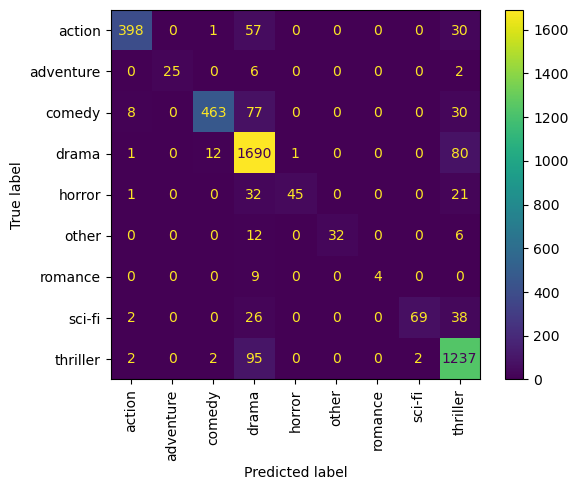

In [38]:
ConfusionMatrixDisplay.from_predictions(yval, y_pred, xticks_rotation="vertical")
plt.show()

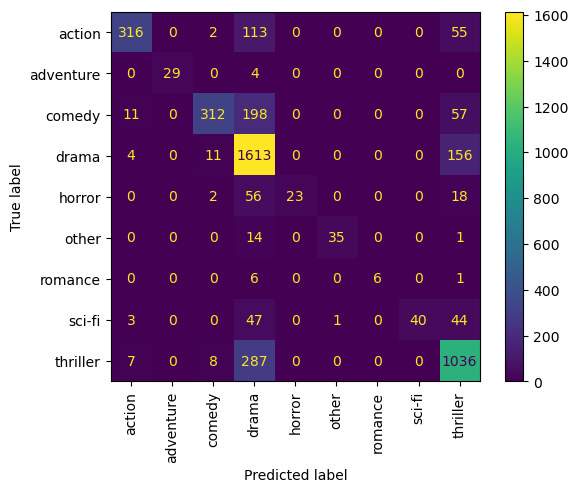

In [39]:
ConfusionMatrixDisplay.from_predictions(yval, y_pred2, xticks_rotation="vertical")
plt.show()

In [40]:
# pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])
# pd.DataFrame(metrics.confusion_matrix(yval,y_pred))
print(metrics.confusion_matrix(yval,y_pred), '\n')
print(metrics.confusion_matrix(yval,y_pred2))

[[ 398    0    1   57    0    0    0    0   30]
 [   0   25    0    6    0    0    0    0    2]
 [   8    0  463   77    0    0    0    0   30]
 [   1    0   12 1690    1    0    0    0   80]
 [   1    0    0   32   45    0    0    0   21]
 [   0    0    0   12    0   32    0    0    6]
 [   0    0    0    9    0    0    4    0    0]
 [   2    0    0   26    0    0    0   69   38]
 [   2    0    2   95    0    0    0    2 1237]] 

[[ 316    0    2  113    0    0    0    0   55]
 [   0   29    0    4    0    0    0    0    0]
 [  11    0  312  198    0    0    0    0   57]
 [   4    0   11 1613    0    0    0    0  156]
 [   0    0    2   56   23    0    0    0   18]
 [   0    0    0   14    0   35    0    0    1]
 [   0    0    0    6    0    0    6    0    1]
 [   3    0    0   47    0    1    0   40   44]
 [   7    0    8  287    0    0    0    0 1036]]


## Thanks!

In [ ]:
# # Loading and predicting test data  - only if we take some samples also for test
# test_path = r'C:\Users\nati_\OneDrive\Desktop\Market Beyond\movie-genres-classification-test.csv'

# test_df = pd.read_csv(test_path, engine='python', error_bad_lines=False) 

# test_df['clean_text'] = test_df['text'].apply(lambda x: clean_text(x))
# # freq_words(test_df['clean_text'], 100)
# test_df['clean_text'] = test_df['clean_text'].apply(lambda x: remove_stopwords(x))
# # freq_words(test_df['clean_text'], 100)
# xtest_tfidf = tfidf_vectorizer.fit_transform(test_df['clean_text'])


# y_test_pred_LR = pd.DataFrame({'id': test_df['id'], 'genre': LRC.predict(xtest_tfidf)})  # Logistic Regression
# y_test_pred_RF = pd.DataFrame({'id': test_df['id'], 'genre': RFC.predict(xtest_tfidf)}) # Random Forest



# pd.DataFrame(y_test_pred_LR).to_csv(r'C:\Users\nati_\y_test_pred_LR.csv')
# pd.DataFrame(y_test_pred_RF).to_csv(r'C:\Users\nati_\y_test_pred_RF.csv')

# y_test_pred_LR['genre'].unique().shape
# y_test_pred_RF['genre'].unique().shape
